In [6]:
import neural_net_class as NNC

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import seaborn as sns

from sklearn.model_selection import  train_test_split 
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [7]:
def one_hot_encoder(input, labels):
    targets = np.zeros((len(input), labels))     # temporary hardcoding
    for i, t in enumerate(input):
        targets[i, t] = 1

    return targets

def accuracy(predictions, targets):
    one_hot_predictions = np.zeros(predictions.shape)

    for i, prediction in enumerate(predictions):
        one_hot_predictions[i, np.argmax(prediction)] = 1
    return accuracy_score(one_hot_predictions, targets)

In [12]:
np.random.seed(2024)

# Loading in the data
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=0)
    
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define layer sizes and activations
layer_output_sizes = [50, 2]
activations = [NNC.sigmoid, NNC.softmax]

# One-hot encode labels
y_train_one_hot = one_hot_encoder(y_train, 2)
y_test_one_hot = one_hot_encoder(y_test, 2)

# Initialize and train the network
nn = NNC.NeuralNet(X_train_scaled, y_train_one_hot, layer_output_sizes, activations, epsilon=0.01, batch_size=10, epochs=300)
nn.train_network()

# Make predictions
pred_prob_train = nn.predict_probabilities(X_train_scaled)
pred_prob_test = nn.predict_probabilities(X_test_scaled)
predictions_test = nn.predict(X_test_scaled)

# Evaluate accuracy
print(f'Train accuracy: {accuracy(pred_prob_train, y_train_one_hot)}')
print(f'Test accuracy: {accuracy(pred_prob_test, y_test_one_hot)}')

Epoch 0: Accuracy = 0.9186813186813186
Epoch 100: Accuracy = 0.9934065934065934
Epoch 200: Accuracy = 1.0
Train accuracy: 1.0
Test accuracy: 0.956140350877193


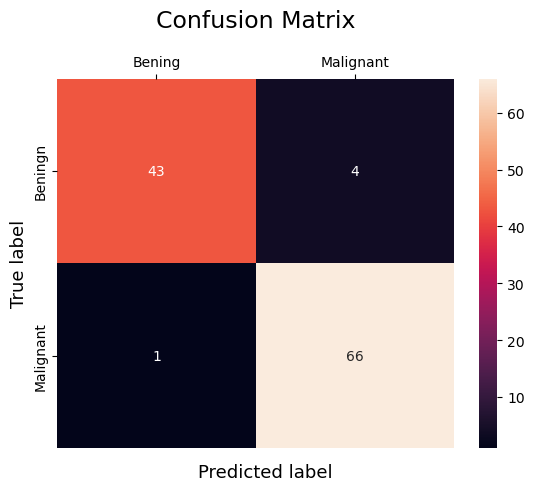

In [13]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions_test)

# Plotting the confusion matrix
ax = sns.heatmap(cm, 
            annot=True,
            xticklabels=['Bening','Malignant'],
            yticklabels=['Beningn','Malignant'])
plt.ylabel('True label', fontsize=13)
plt.title('Confusion Matrix', fontsize=17, pad=20, loc='center')
ax.set(xlabel="", ylabel="True label")
ax.xaxis.tick_top()

plt.gca().figure.text(0.45, 0.05, 'Predicted label', ha='center', fontsize=13)
plt.show()
